<a href="https://colab.research.google.com/github/maccarini/wm-sentence-similarity-cs/blob/main/t25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

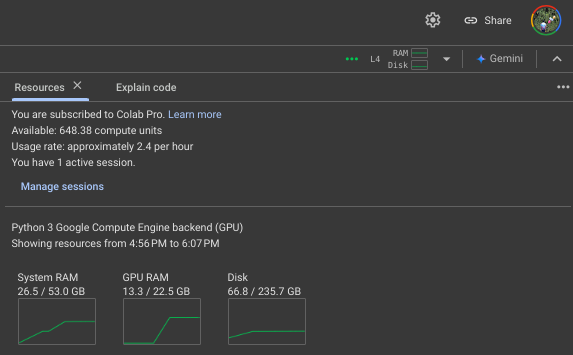

**This is meant for Colab Pro**

"Wait but there is the option for 12GB VRAM cards so what gives?"

short answer is --> Flux1-dev2pro (as explained here: https://medium.com/@zhiwangshi28/why-flux-lora-so-hard-to-train-and-how-to-overcome-it-a0c70bc59eaf)

bdsqlsz/flux1-dev2pro-single is still a 22.17GB file that cannot fit into a 12GB VRAM graphics card. so you do the math.

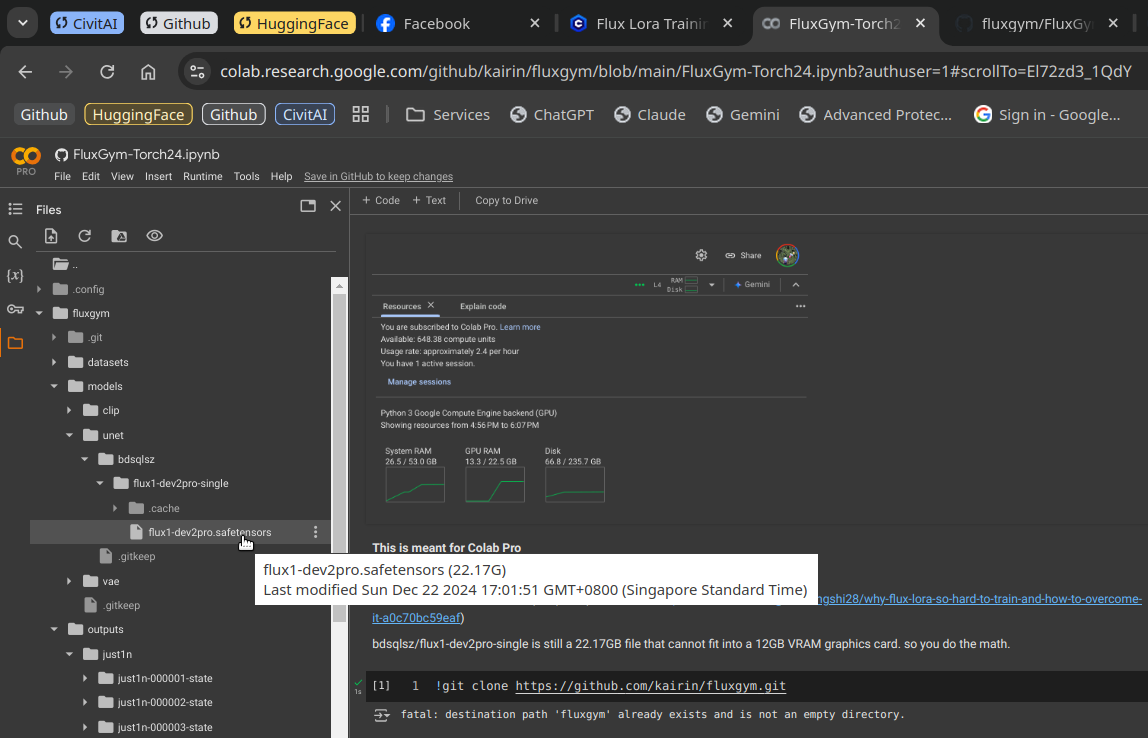


In [4]:
!git clone https://github.com/kairin/fluxgym.git

Cloning into 'fluxgym'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 366 (delta 162), reused 114 (delta 114), pack-reused 170 (from 2)
Receiving objects: 100% (366/366), 17.24 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [5]:
%cd /content/fluxgym
!git clone -b sd3 https://github.com/kohya-ss/sd-scripts

/content/fluxgym
Cloning into 'sd-scripts'...
remote: Enumerating objects: 9061, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9061 (delta 10), reused 5 (delta 5), pack-reused 9048 (from 3)
Receiving objects: 100% (9061/9061), 11.02 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (6576/6576), done.


# **Install each projects dependencies**

In [6]:
%cd /content/fluxgym/sd-scripts/
!pip install -r requirements.txt

/content/fluxgym/sd-scripts
Obtaining file:///content/fluxgym/sd-scripts (from -r requirements.txt (line 46))
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 15.7 MB/s eta 0:00:00
  

In [7]:
%cd /content/fluxgym/
!pip install -r requirements.txt

/content/fluxgym
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-pj_7onwr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-pj_7onwr
  Resolved https://github.com/huggingface/diffusers.git to commit 9a147b82f72e5df4553cb0f845bb957be3aa6028
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 723.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

In [1]:
!pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install --pre torch==2.4 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 # testing with torch 2.4 instead of torch 2.5
!pip install deepspeed

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
!export TOKENIZERS_PARALLELISM=false

https://github.com/deepset-ai/haystack/issues/660#issuecomment-740453885

https://stackoverflow.com/questions/62691279/how-to-disable-tokenizers-parallelism-true-false-warning

The following error is encountered when using the basic options after loading the app.py.

this is a very frustrating error because it doesn't really explain anything at all to an ordinary person.

and as you can see, the training did continue... but there is no visual indicator on what is going on. the training continue really slowly.

```
[2024-12-22 09:33:52] [INFO] huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
[2024-12-22 09:33:52] [INFO] To disable this warning, you can either:
[2024-12-22 09:33:52] [INFO] - Avoid using `tokenizers` before the fork if possible
[2024-12-22 09:33:52] [INFO] - Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[2024-12-22 09:33:52] [INFO] huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
[2024-12-22 09:33:52] [INFO] To disable this warning, you can either:
[2024-12-22 09:33:52] [INFO] - Avoid using `tokenizers` before the fork if possible
[2024-12-22 09:33:52] [INFO] - Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[2024-12-22 09:33:52] [INFO] 2024-12-22 09:33:52 INFO     epoch is incremented. current_epoch: 0, epoch: 1      train_util.py:715
[2024-12-22 09:33:52] [INFO] 2024-12-22 09:33:52 INFO     epoch is incremented. current_epoch: 0, epoch: 1      train_util.py:715
[2024-12-22 09:43:21] [INFO] steps:   0%|          | 1/3120 [00:04<3:58:08,  4.58s/it]
steps:   0%|          | 1/3120 [00:04<3:58:10,  4.58s/it, avr_loss=0.348]
steps:   0%|          | 2/3120 [00:07<3:13:03,  3.71s/it, avr_loss=0.348]
steps:   0%|          | 2/3120 [00:07<3:13:03,  3.72s/it, avr_loss=0.381]
steps:   0%|          | 3/3120 [00:10<2:56:35,  3.40s/it, avr_loss=0.381]
steps:   0%|          | 3/3120 [00:10<2:56:36,  3.40s/it, avr_loss=0.378]
```

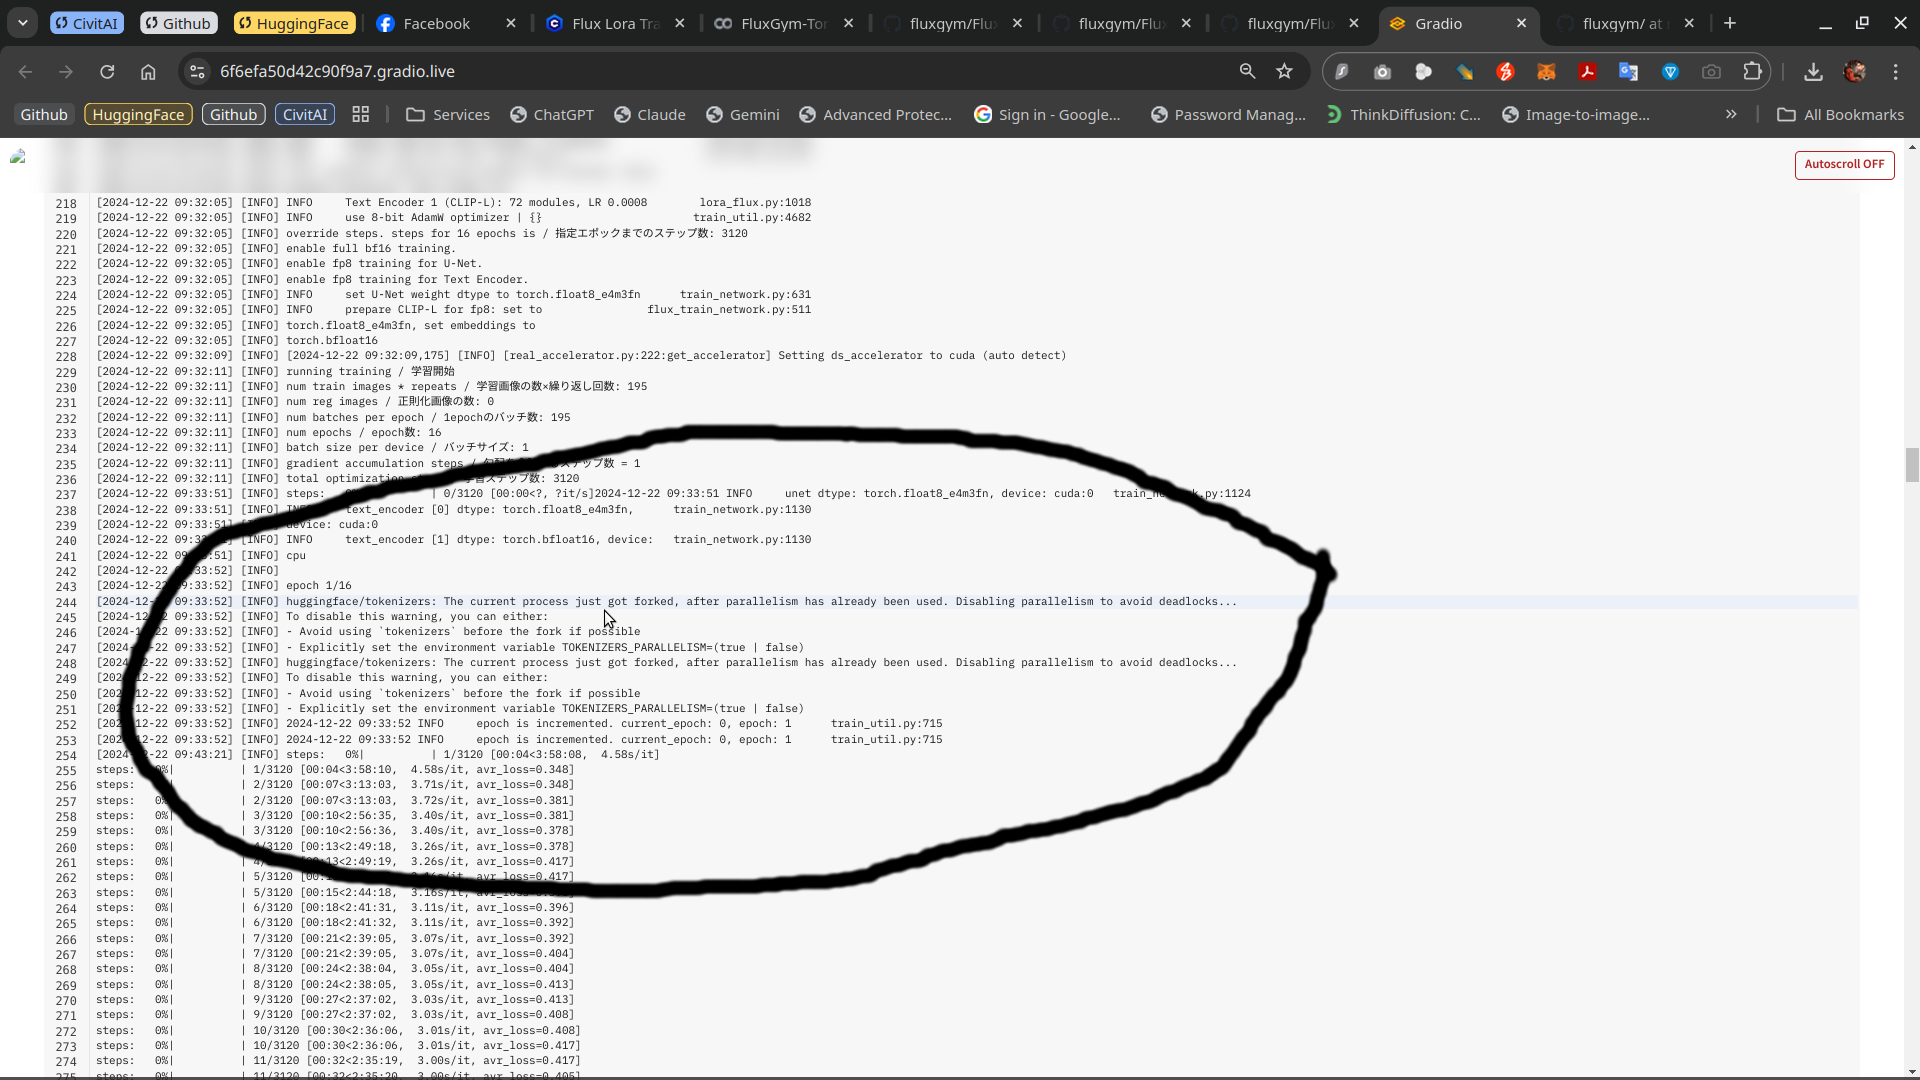

when you encounter this error, you have to wait **a very long time** before the training shows that it is in fact doing something. so just be patient.

**YOU HAVE TO WAIT**

# **Start the web server and click the share link**

In [ ]:
%cd /content/fluxgym/
# !python testapp.py
!python app.py

/content/fluxgym
2025-02-14 12:22:47.169048: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 12:22:47.187612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739535767.210845    1979 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739535767.217700    1979 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 12:22:47.241028: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use av

# **Download the completed Loras from directory:**
fluxgym/outputs
# **Copy and paste the models URL in the section below:**

```
filename = '/content/fluxgym/outputs/file.safetensors' #your lora filename

```

In [ ]:
from google.colab import files

filename = '/content/fluxgym/outputs/file.safetensors' #your lora filename
files.download(filename)

# **Alternatively just zip the entire directory:**
fluxgym/outputs
# **Copy and paste the zip file URL in the section above:**

```
filename = '/content/fluxgym/outputs.zip' #your zip filename

```